# 서울특별시 공공자전거 외국인 신규가입자 분석

2024년 7-12월 데이터 분석

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [ ]:
# CSV 파일 읽기 - 다양한 인코딩 시도
file_path = r"..\서울특별시 공공자전거 외국인 대여정보(일별)_24.7-12.csv"

encodings = ['utf-8', 'cp949', 'euc-kr', 'utf-8-sig']
df = None

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"성공적으로 {encoding} 인코딩으로 읽었습니다.")
        break
    except Exception as e:
        print(f"{encoding} 인코딩 실패: {e}")
        continue

if df is not None:
    print("\n컬럼명:", df.columns.tolist())
    print("데이터 형태:", df.shape)
    print("\n첫 5행:")
    print(df.head())


utf-8 인코딩 실패: 'utf-8' codec can't decode byte 0xc0 in position 0: invalid start byte
성공적으로 cp949 인코딩으로 읽었습니다.

컬럼명: ['일시', '대여소명', '대여건수', '반납건수']
데이터 형태: (28116, 4)

첫 5행:
           일시                     대여소명  대여건수  반납건수
0  2024-07-01             108. 서교동 사거리     1     0
1  2024-07-01      505. 자양사거리 광진아크로텔 앞     0     1
2  2024-07-01  1153. 발산역 1번, 9번 인근 대여소     1     0
3  2024-07-01   510. 뚝도아리수정수센터 버스정류소 옆     3     2
4  2024-07-01        511. 서울숲역 5번 출구 옆     1     3


In [5]:
# 데이터 기본 정보 확인
print("데이터 정보:")
print(df.info())
print("\n결측값 확인:")
print(df.isnull().sum())


데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28116 entries, 0 to 28115
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일시      28116 non-null  object
 1   대여소명    28116 non-null  object
 2   대여건수    28116 non-null  int64 
 3   반납건수    28116 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 878.8+ KB
None

결측값 확인:
일시      0
대여소명    0
대여건수    0
반납건수    0
dtype: int64


In [6]:
# 컬럼명 확인 및 정리
print("원본 컬럼명:", df.columns.tolist())

# 컬럼명이 한글로 되어있을 것으로 예상되므로 적절히 매핑
# 일반적으로 날짜, 대여소명, 대여수, 반납수 순으로 되어있을 것으로 예상
if len(df.columns) >= 4:
    df.columns = ['날짜', '대여소명', '대여수', '반납수']
    print("새로운 컬럼명:", df.columns.tolist())
    
print("\n정리된 데이터:")
print(df.head())


원본 컬럼명: ['일시', '대여소명', '대여건수', '반납건수']
새로운 컬럼명: ['날짜', '대여소명', '대여수', '반납수']

정리된 데이터:
           날짜                     대여소명  대여수  반납수
0  2024-07-01             108. 서교동 사거리    1    0
1  2024-07-01      505. 자양사거리 광진아크로텔 앞    0    1
2  2024-07-01  1153. 발산역 1번, 9번 인근 대여소    1    0
3  2024-07-01   510. 뚝도아리수정수센터 버스정류소 옆    3    2
4  2024-07-01        511. 서울숲역 5번 출구 옆    1    3


In [7]:
# 날짜 컬럼을 datetime으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 월과 요일 정보 추가
df['월'] = df['날짜'].dt.month
df['요일'] = df['날짜'].dt.day_name()
df['요일_한글'] = df['날짜'].dt.strftime('%A').map({
    'Monday': '월요일',
    'Tuesday': '화요일', 
    'Wednesday': '수요일',
    'Thursday': '목요일',
    'Friday': '금요일',
    'Saturday': '토요일',
    'Sunday': '일요일'
})

print("날짜 처리 완료:")
print(df[['날짜', '월', '요일_한글']].head())


날짜 처리 완료:
          날짜  월 요일_한글
0 2024-07-01  7   월요일
1 2024-07-01  7   월요일
2 2024-07-01  7   월요일
3 2024-07-01  7   월요일
4 2024-07-01  7   월요일


In [8]:
# 외국인 신규가입자 데이터 분석
# 대여수와 반납수를 숫자형으로 변환
df['대여수'] = pd.to_numeric(df['대여수'], errors='coerce').fillna(0)
df['반납수'] = pd.to_numeric(df['반납수'], errors='coerce').fillna(0)

print("전체 외국인 신규가입자 현황:")
total_rental = df['대여수'].sum()
total_return = df['반납수'].sum()
print(f"총 대여 횟수: {total_rental:,}회")
print(f"총 반납 횟수: {total_return:,}회")
print(f"전체 데이터 기간: {df['날짜'].min()} ~ {df['날짜'].max()}")


전체 외국인 신규가입자 현황:
총 대여 횟수: 31,776회
총 반납 횟수: 31,265회
전체 데이터 기간: 2024-07-01 00:00:00 ~ 2024-12-31 00:00:00


월별 외국인 대여/반납 현황:
    월   대여수   반납수
0   7  6602  6493
1   8  5091  5024
2   9  7271  7143
3  10  7108  6989
4  11  4296  4231
5  12  1408  1385


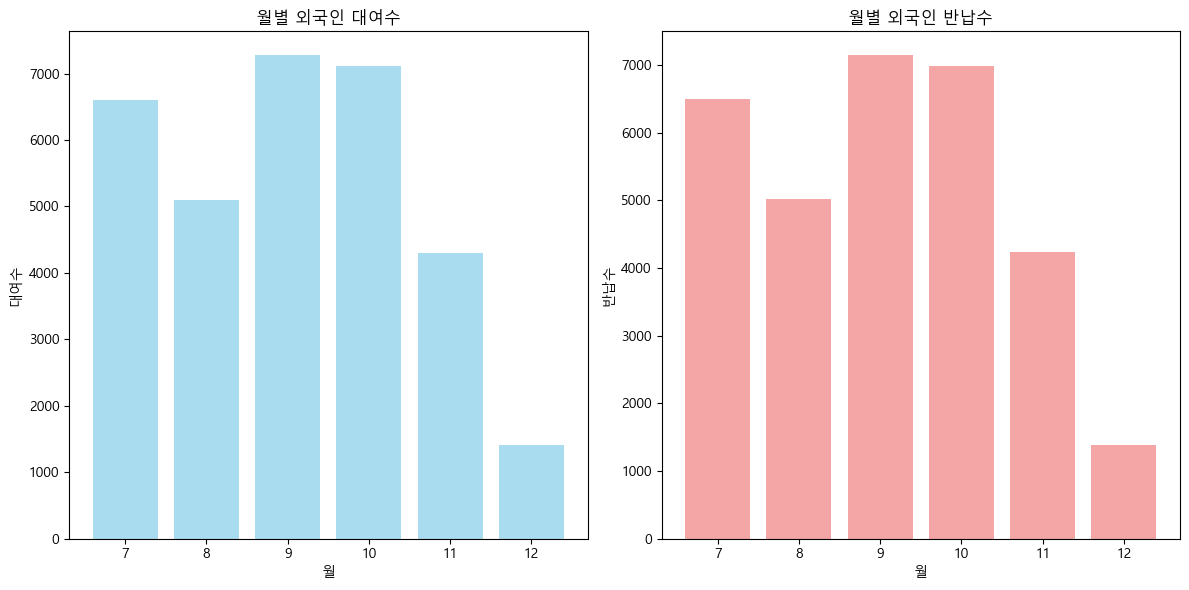


가장 많이 대여한 월: 9월 (7,271회)
가장 적게 대여한 월: 12월 (1,408회)


In [9]:
# 월별 분석
monthly_stats = df.groupby('월').agg({
    '대여수': 'sum',
    '반납수': 'sum'
}).reset_index()

print("월별 외국인 대여/반납 현황:")
print(monthly_stats)

# 월별 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(monthly_stats['월'], monthly_stats['대여수'], color='skyblue', alpha=0.7)
plt.title('월별 외국인 대여수')
plt.xlabel('월')
plt.ylabel('대여수')
plt.xticks(monthly_stats['월'])

plt.subplot(1, 2, 2)
plt.bar(monthly_stats['월'], monthly_stats['반납수'], color='lightcoral', alpha=0.7)
plt.title('월별 외국인 반납수')
plt.xlabel('월')
plt.ylabel('반납수')
plt.xticks(monthly_stats['월'])

plt.tight_layout()
plt.show()

print(f"\n가장 많이 대여한 월: {monthly_stats.loc[monthly_stats['대여수'].idxmax(), '월']}월 ({monthly_stats['대여수'].max():,}회)")
print(f"가장 적게 대여한 월: {monthly_stats.loc[monthly_stats['대여수'].idxmin(), '월']}월 ({monthly_stats['대여수'].min():,}회)")


요일별 외국인 대여/반납 현황:
  요일_한글   대여수   반납수
0   월요일  4771  4699
1   화요일  3971  3916
2   수요일  3993  3935
3   목요일  3976  3920
4   금요일  4188  4131
5   토요일  5268  5174
6   일요일  5609  5490


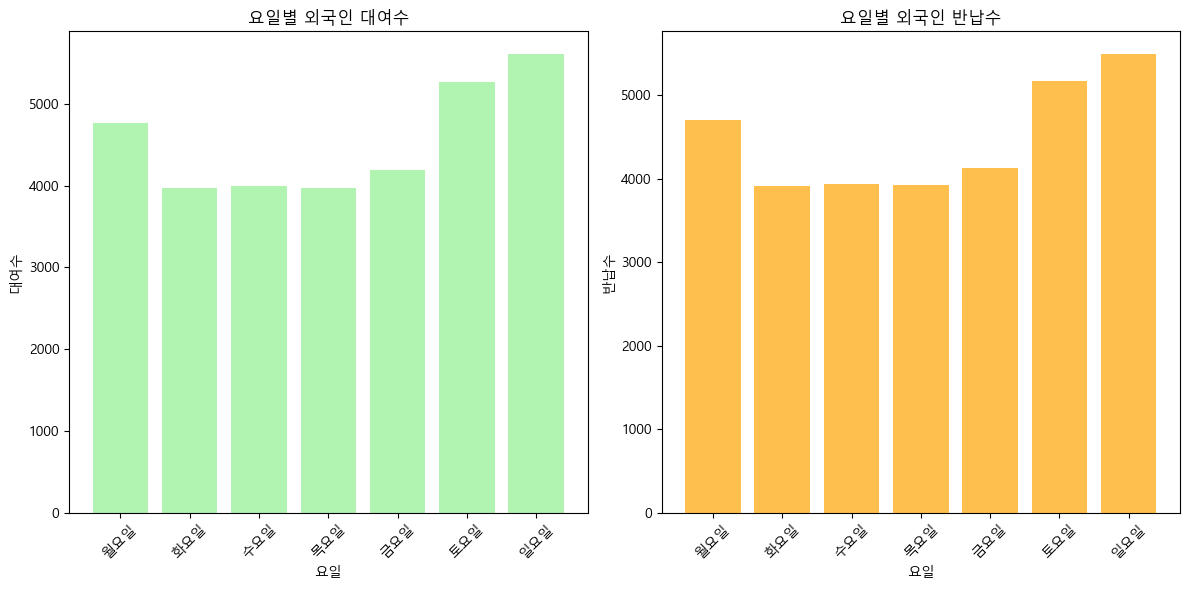


가장 많이 대여한 요일: 일요일 (5,609회)
가장 적게 대여한 요일: 화요일 (3,971회)


In [10]:
# 요일별 분석
weekday_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

weekday_stats = df.groupby('요일_한글').agg({
    '대여수': 'sum',
    '반납수': 'sum'
}).reindex(weekday_order).reset_index()

print("요일별 외국인 대여/반납 현황:")
print(weekday_stats)

# 요일별 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(weekday_stats)), weekday_stats['대여수'], color='lightgreen', alpha=0.7)
plt.title('요일별 외국인 대여수')
plt.xlabel('요일')
plt.ylabel('대여수')
plt.xticks(range(len(weekday_stats)), weekday_stats['요일_한글'], rotation=45)

plt.subplot(1, 2, 2)
plt.bar(range(len(weekday_stats)), weekday_stats['반납수'], color='orange', alpha=0.7)
plt.title('요일별 외국인 반납수')
plt.xlabel('요일')
plt.ylabel('반납수')
plt.xticks(range(len(weekday_stats)), weekday_stats['요일_한글'], rotation=45)

plt.tight_layout()
plt.show()

print(f"\n가장 많이 대여한 요일: {weekday_stats.loc[weekday_stats['대여수'].idxmax(), '요일_한글']} ({weekday_stats['대여수'].max():,}회)")
print(f"가장 적게 대여한 요일: {weekday_stats.loc[weekday_stats['대여수'].idxmin(), '요일_한글']} ({weekday_stats['대여수'].min():,}회)")


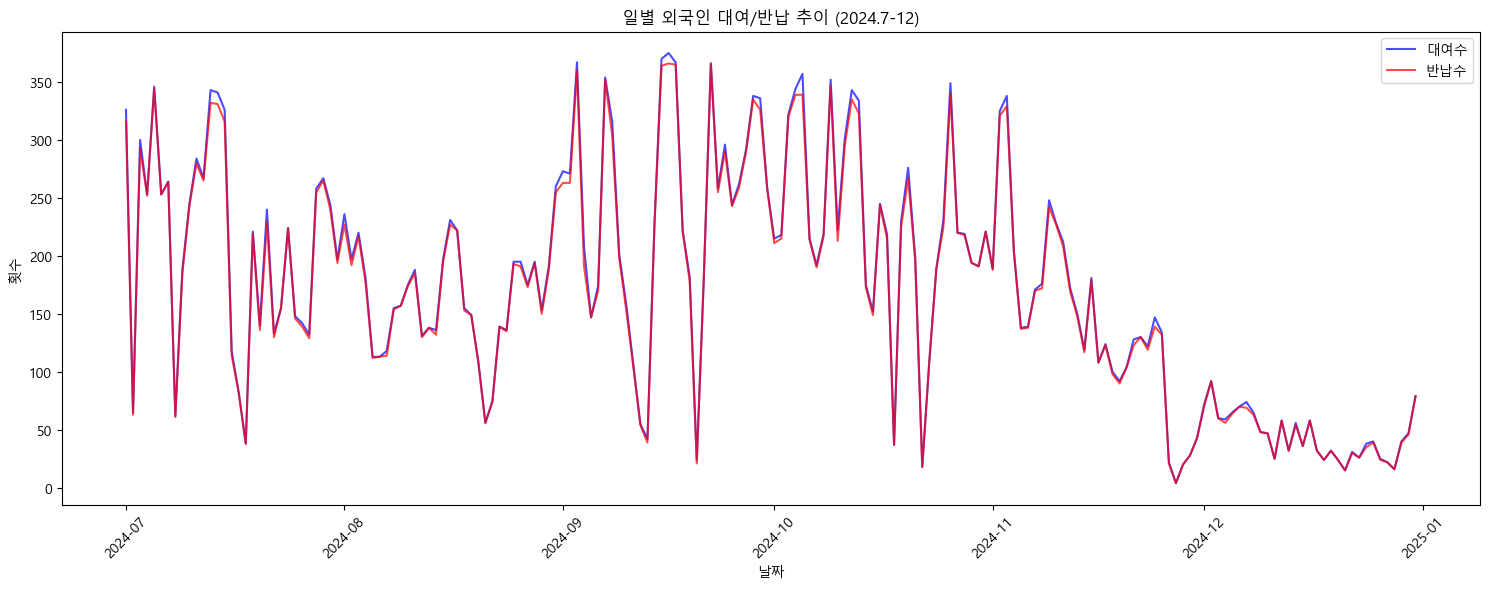

일평균 대여수: 172.7회
일평균 반납수: 169.9회


In [11]:
# 일별 추이 분석
daily_stats = df.groupby('날짜').agg({
    '대여수': 'sum',
    '반납수': 'sum'
}).reset_index()

plt.figure(figsize=(15, 6))
plt.plot(daily_stats['날짜'], daily_stats['대여수'], label='대여수', color='blue', alpha=0.7)
plt.plot(daily_stats['날짜'], daily_stats['반납수'], label='반납수', color='red', alpha=0.7)
plt.title('일별 외국인 대여/반납 추이 (2024.7-12)')
plt.xlabel('날짜')
plt.ylabel('횟수')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"일평균 대여수: {daily_stats['대여수'].mean():.1f}회")
print(f"일평균 반납수: {daily_stats['반납수'].mean():.1f}회")


In [12]:
# 종합 분석 결과
print("=" * 50)
print("외국인 신규가입자 분석 결과 요약")
print("=" * 50)
print(f"분석 기간: {df['날짜'].min().strftime('%Y-%m-%d')} ~ {df['날짜'].max().strftime('%Y-%m-%d')}")
print(f"총 데이터 수: {len(df):,}건")
print(f"전체 대여 횟수: {df['대여수'].sum():,}회")
print(f"전체 반납 횟수: {df['반납수'].sum():,}회")
print()
print("월별 분석:")
print(f"- 가장 활발한 월: {monthly_stats.loc[monthly_stats['대여수'].idxmax(), '월']}월")
print(f"- 가장 저조한 월: {monthly_stats.loc[monthly_stats['대여수'].idxmin(), '월']}월")
print()
print("요일별 분석:")
print(f"- 가장 활발한 요일: {weekday_stats.loc[weekday_stats['대여수'].idxmax(), '요일_한글']}")
print(f"- 가장 저조한 요일: {weekday_stats.loc[weekday_stats['대여수'].idxmin(), '요일_한글']}")


외국인 신규가입자 분석 결과 요약
분석 기간: 2024-07-01 ~ 2024-12-31
총 데이터 수: 28,116건
전체 대여 횟수: 31,776회
전체 반납 횟수: 31,265회

월별 분석:
- 가장 활발한 월: 9월
- 가장 저조한 월: 12월

요일별 분석:
- 가장 활발한 요일: 일요일
- 가장 저조한 요일: 화요일
